In [3]:
import pandas as pd
import numpy as np

In [4]:
dice = pd.Series([1,2,3,4,5,6])

In [5]:
dice.sample(1).values[0]

np.int64(1)

In [6]:
rolls = [dice.sample(1).values[0] for _ in range(100000)]

In [7]:
rolls[:10]

[np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(6),
 np.int64(3),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(4),
 np.int64(2)]

In [8]:
pd.Series(rolls).value_counts(normalize=True)

1    0.16825
6    0.16725
5    0.16715
4    0.16654
2    0.16583
3    0.16498
Name: proportion, dtype: float64

In [9]:
1/6

0.16666666666666666

In [10]:
dice.value_counts(normalize=True)

1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
Name: proportion, dtype: float64

Определить вероятность того, что в группе, состоящей из 23 человек, у двух людей будет совпадение дней рождения (число и месяц).


Парадокс дней рождения⁠⁠
В теории вероятностей и комбинаторике с днями рождения связана известная задача, называемая «парадокс дней рождения». Данный «парадокс» гласит, что в любой случайно собранной группе из 23 человек с вероятностью более 50 % у двух или более человек дни рождения совпадают (на первый взгляд, это противоречит житейской интуиции). С ростом численности группы людей вероятность наличия совпадения в днях рождения быстро приближается к единице: так, в случайно собранной группе из 57 человек двое из них имеют день рождения в один день с вероятностью 99 %.

### ошибка Байесовского восприятия /  Искажение наших Байесов
https://habr.com/ru/articles/72301/

https://pikabu.ru/story/paradoks_dney_rozhdeniya_175264

https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81_%D0%B4%D0%BD%D0%B5%D0%B9_%D1%80%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F
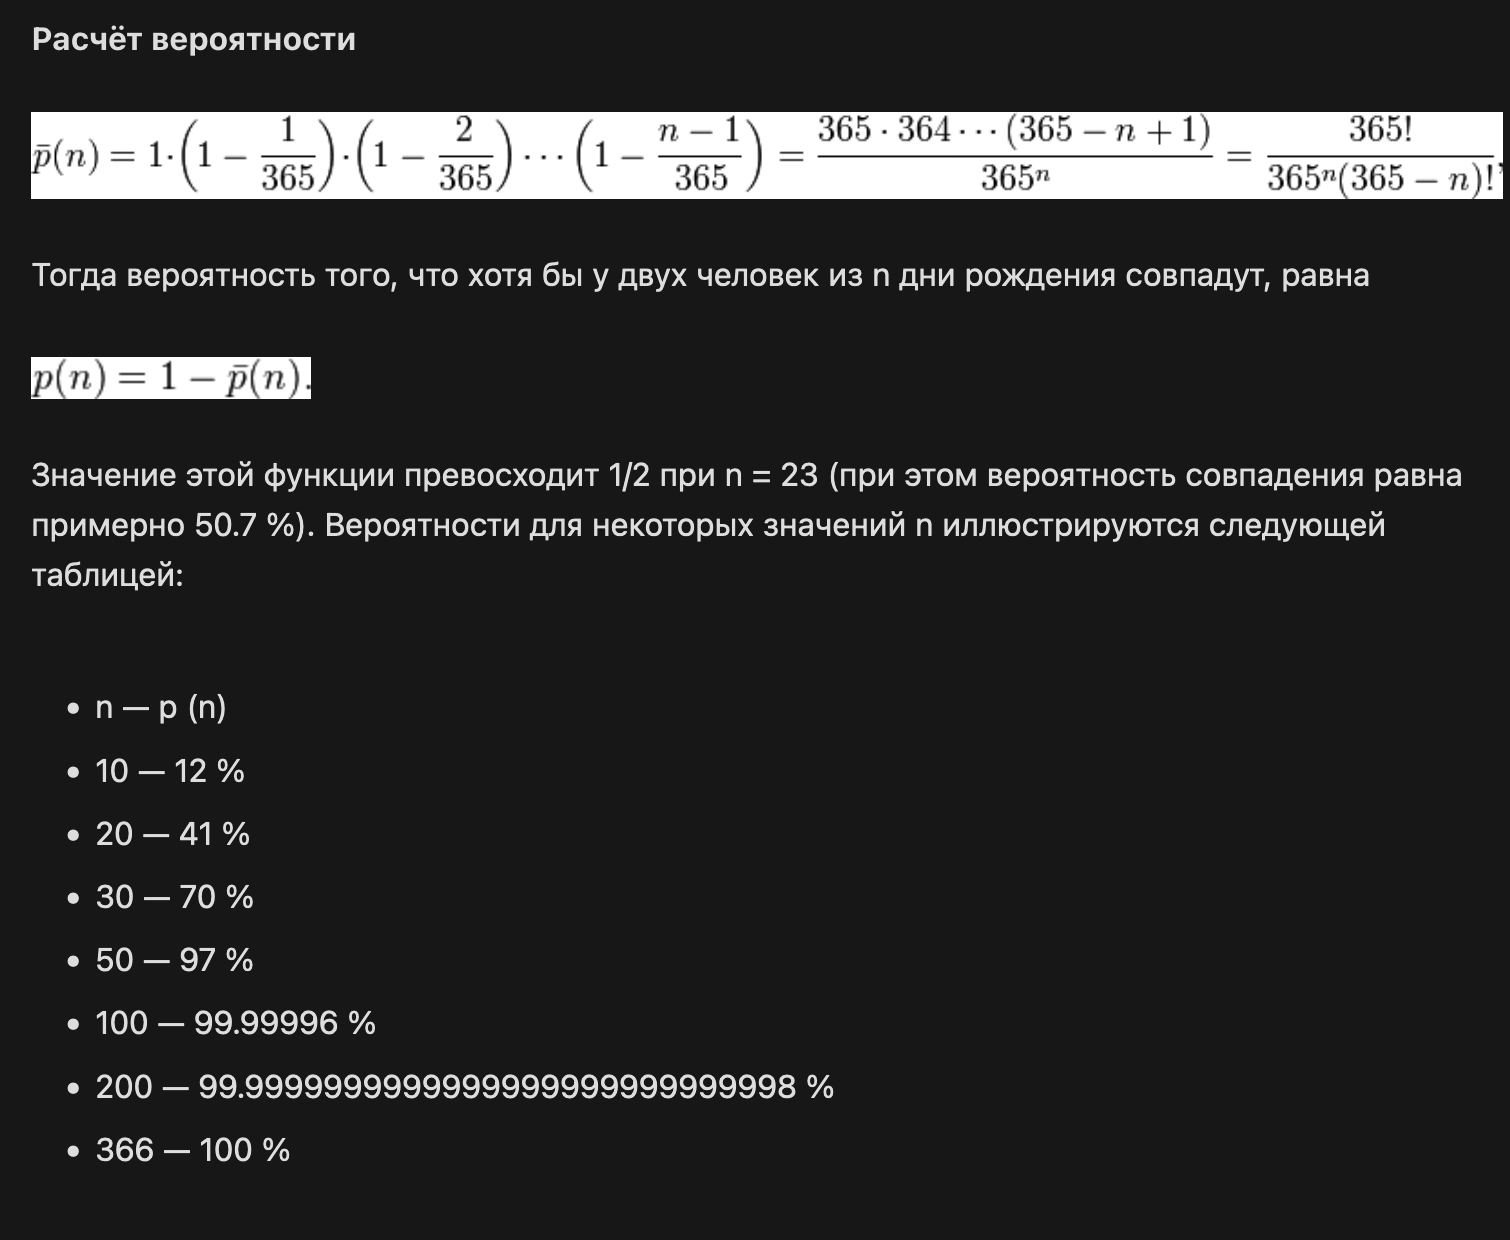

In [11]:
bd = pd.Series(range(365))

In [12]:
bd

0        0
1        1
2        2
3        3
4        4
      ... 
360    360
361    361
362    362
363    363
364    364
Length: 365, dtype: int64

In [13]:
t = bd.sample(23,replace=True)

In [14]:
t.duplicated()

202    False
70     False
179    False
192    False
107    False
121    False
180    False
205    False
171    False
337    False
351    False
258    False
258     True
146    False
118    False
188    False
195    False
70      True
253    False
339    False
29     False
64     False
29      True
dtype: bool

In [15]:
t.duplicated().max()

np.True_

In [16]:
rooms = [bd.sample(23,replace=True).duplicated().max() for _ in range(10000)]

In [17]:
rooms[:10]

[np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_]

In [18]:
np.mean(rooms)

np.float64(0.4998)

In [19]:
rooms = [bd.sample(57,replace=True).duplicated().max() for _ in range(10000)]

In [20]:
np.mean(rooms)

np.float64(0.9881)

In [21]:
rooms = [bd.sample(364,replace=True).duplicated().max() for _ in range(100000)]

In [22]:
np.mean(rooms)

np.float64(1.0)

Экзамен проходит по следующей схеме: если некоторый билет уже был вытянут, то после ответа экзаменатор откладывает его в сторону. Студент выучил 20 билетов из 30. Когда ему выгоднее идти, первым или вторым, чтобы вероятность вынуть выученный билет была больше?

https://ege-study.ru/teoriya-veroyatnostej/
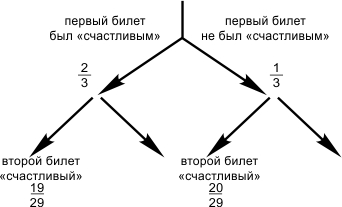


In [23]:
tickets = list(range(1,31))

In [24]:
tickets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [25]:
student = list(range(1,21))

In [26]:
student

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [27]:
from random import shuffle

In [28]:
tickets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [29]:
shuffle(tickets)

In [30]:
tickets

[25,
 7,
 10,
 14,
 30,
 17,
 15,
 6,
 27,
 5,
 2,
 13,
 9,
 23,
 19,
 16,
 22,
 11,
 18,
 21,
 1,
 24,
 3,
 29,
 4,
 8,
 20,
 12,
 28,
 26]

In [31]:
3 in student

True

In [32]:
n = 100000
student = list(range(1,21))
tickets = list(range(1,31))
result = []

for _ in range(n):
  shuffle(tickets)
  result.append(tickets[0] in student)

In [33]:
np.mean(result)

np.float64(0.66647)

In [34]:
n = 100000
student = list(range(1,21))
tickets = list(range(1,31))
result = []

for _ in range(n):
  shuffle(tickets)
  result.append(tickets[1] in student)

In [35]:
np.mean(result) # искажение Байесовского восприятия

np.float64(0.66694)

In [36]:
n = 100000
student = list(range(1,21))
tickets = list(range(1,31))
result = []

for _ in range(n):
  shuffle(tickets)
  result.append(tickets[2] in student)

In [37]:
np.mean(result)

np.float64(0.66777)

In [38]:
2 / 3

0.6666666666666666

Ночью произошло ДТП с участием такси. В городе работают две компании такси — «Синие» и «Зелёные». «Зелёным» принадлежит 85% такси, «Синим» 15%. Свидетель аварии утверждает, что такси принадлежало «Синим». Следственный эксперимент показал, что ночью свидетель верно определяет цвет такси в 80%. Какова вероятность того, что такси действительно принадлежало «Синим»?




Интуитивные догадки большинства людей обычно далеки от истины. Удивительно, но, несмотря на показания свидетеля, вероятность того, что такси зелёное — 59%. Причина в том, что зелёных такси в городе много (85%) и этот факт «перевешивает» другую вероятность 80% уверенности свидетеля.


К примеру, возьмём 100 типичных ДТП:


1) Из этих 100 ДТП будут участвовать 15 синих такси, и свидетель верно определит цвет для 80% из них (то есть для 15 * 0,8 = 12 такси свидетель скажет, что такси было синим)


2) В других 85 ДТП будет участвовать зеленое такси, и свидетель неверно определит цвет для 20% из них (то есть для 85 * 0,2 = 17 такси свидетель скажет, что такси было синим, когда оно на самом деле было зеленым)


В итоге из 100 ДТП свидетель в 29 случаях скажет, что такси было синим. Но синим оно действительно будет только в 12 случаях из этих 29. Вероятность того, что такси действительно синее, 12 / 29 = 0,41 = 41%


Из тех, кому предлагали решить эту задачу, значения между 20% и 70% назвали меньше половины. Большинство ответов было в районе 80%. Люди переоценивали значимость конкретного и ясного показания свидетеля и недооценивали тот факт, что синих такси в городе намного меньше зелёных.

In [39]:
np.random.binomial(1,0.15)
# 1 - синее
# 0 - зелёное

0

In [ ]:
# генератор 
def witness(taxi):
  if np.random.binomial(1,0.8):
    return taxi
  return abs(taxi - 1)

In [105]:
witness(0)
# input 0 - зелёное, return 1 - синее, ошибся

0

In [ ]:
#  monte carlo
n = 100000
result = []
for _ in range(n):
  taxi = np.random.binomial(1,0.15)
  witness_answer = witness(taxi)
  result.append((taxi,witness_answer))

In [43]:
result

[(0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [44]:
t = pd.DataFrame(result, columns=['taxi','witness_answer'])
t

,taxi,witness_answer
0,0,0
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
99995,1,0
99996,0,0
99997,0,0
99998,1,1


In [45]:
t.groupby('witness_answer')['taxi'].mean()
# 1    0.416681 41% случаев свидетель будет прав, что реально принадлежит синим 
# самое интересное что свидетель верно определяет в 80% случаев, получается это опять искажение Баейсовского восприятия

witness_answer
0    0.041010
1    0.418014
Name: taxi, dtype: float64

Русская рулетка. Есть револьвер с 2 вставленными подряд патронами. Первый крутит барабан и стреляет и остается жив. Твоя очередь: тебе предлагает покрутить барабан перед выстрелом. Согласишься или сразу выстрелишь и почему?
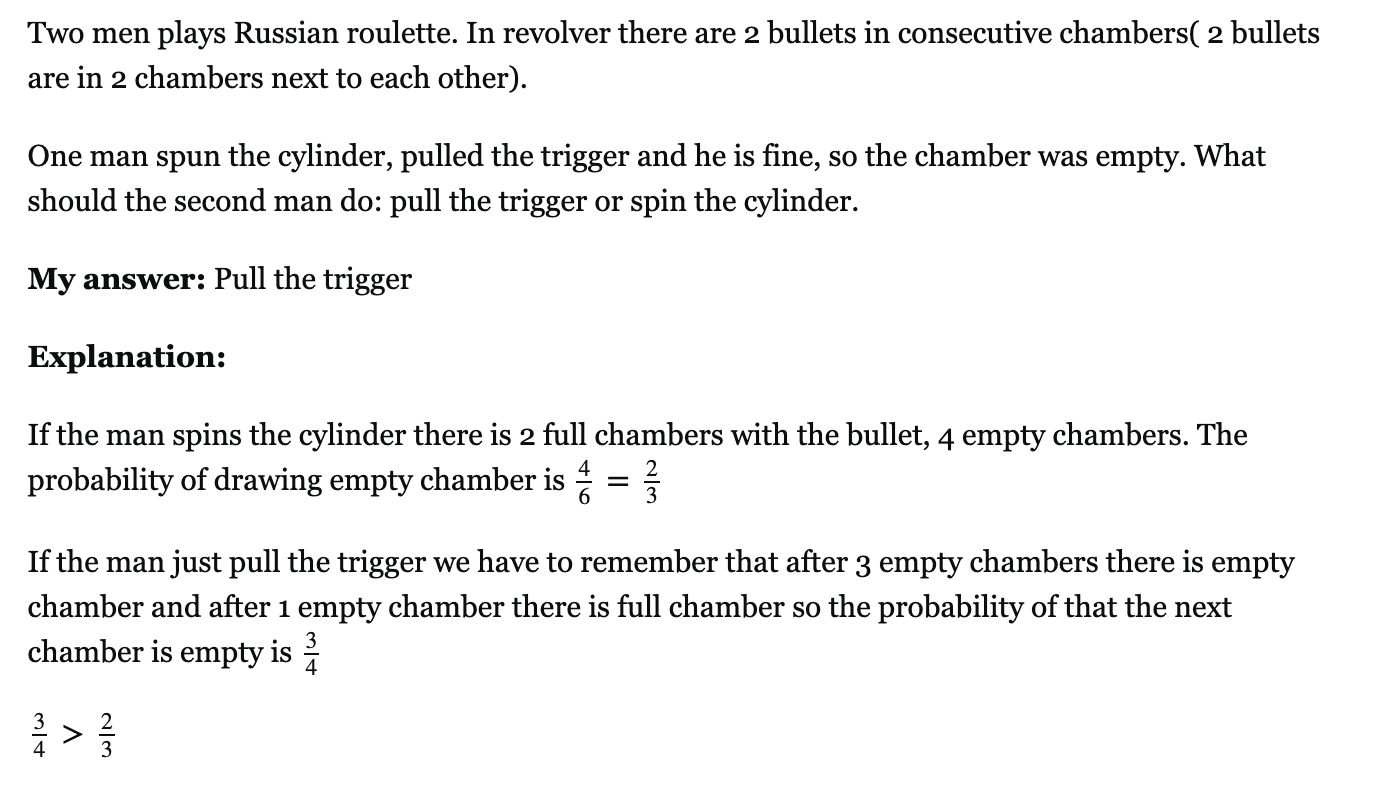
https://math.stackexchange.com/questions/849347/russian-roulette-should-a-player-pull-the-trigger-or-spin-the-cylinder

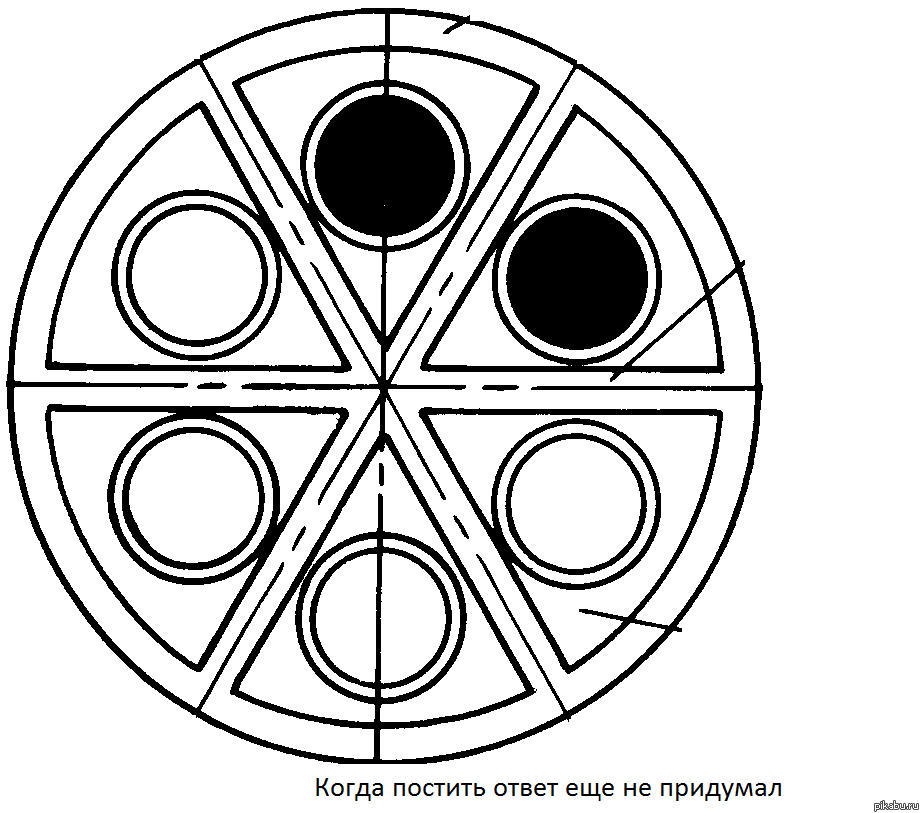

In [46]:
chamber = [1,1,0,0,0,0]

In [47]:
[1,0,0,0,0,1]

[1, 0, 0, 0, 0, 1]

In [48]:
def one_turn(chamber):
  new_chamber = [0,0,0,0,0,0]
  n = len(chamber)
  for i in range(n):
    if i < n-1:
      new_chamber[i+1] = chamber[i]
    else:
      new_chamber[0] = chamber[i]
  return new_chamber

In [49]:
chamber = [1,1,0,0,0,0]

In [50]:
one_turn(chamber)

[0, 1, 1, 0, 0, 0]

In [51]:
one_turn([0, 1, 1, 0, 0, 0])

[0, 0, 1, 1, 0, 0]

In [52]:
one_turn([0, 0, 1, 1, 0, 0])

[0, 0, 0, 1, 1, 0]

In [53]:
one_turn([0, 0, 0, 1, 1, 0])

[0, 0, 0, 0, 1, 1]

In [54]:
one_turn([0, 0, 0, 0, 1, 1])

[1, 0, 0, 0, 0, 1]

In [55]:
one_turn([1, 0, 0, 0, 0, 1])

[1, 1, 0, 0, 0, 0]

In [56]:
def spin_chamber(chamber):
  n = np.random.randint(1,7)
  for _ in range(n):
    chamber = one_turn(chamber)
  return chamber

In [57]:
spin_chamber([1, 1, 0, 0, 0, 0])

[1, 1, 0, 0, 0, 0]

In [58]:
pd.Series([spin_chamber([1, 1, 0, 0, 0, 0]) for _ in range(100000)]).astype(str).value_counts(normalize=True)

[0, 1, 1, 0, 0, 0]    0.16763
[0, 0, 0, 0, 1, 1]    0.16711
[1, 0, 0, 0, 0, 1]    0.16707
[1, 1, 0, 0, 0, 0]    0.16702
[0, 0, 0, 1, 1, 0]    0.16585
[0, 0, 1, 1, 0, 0]    0.16532
Name: proportion, dtype: float64

In [59]:
# заряжаем револьвер
chamber = [1,1,0,0,0,0]
# первый игрок крутит барабан
chamber = spin_chamber(chamber)
# первый игрок стреляет
chamber = one_turn(chamber)
p1 = chamber[0]
chamber[0] = 0

# второй игрок вращает барабан -- нужно ли это действие?
chamber = spin_chamber(chamber)

# второй игрок стреляет
chamber = one_turn(chamber)
p2 = chamber[0]


In [60]:
p1

0

In [61]:
p2

0

In [62]:
n = 10000
result = []

for _ in range(n):
  # заряжаем револьвер
  chamber = [1,1,0,0,0,0]
  # первый игрок крутит барабан
  chamber = spin_chamber(chamber)
  # первый игрок стреляет
  chamber = one_turn(chamber)
  p1 = chamber[0]
  # убрали пулю после выстрела
  chamber[0] = 0

  # второй игрок вращает барабан -- нужно ли это действие?
  chamber = spin_chamber(chamber)

  # второй игрок стреляет
  chamber = one_turn(chamber)
  p2 = chamber[0]

  result.append((p1,p2))

In [63]:
t = pd.DataFrame(result,columns=['p1','p2'])

In [64]:
t

,p1,p2
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
9995,0,1
9996,1,0
9997,1,1
9998,0,1


In [65]:
t.groupby('p1')['p2'].agg(['count','mean'])
# 0 - выжил, первый игрок выжил, вероятность что 2 игрок умрет, если крутонешь барабан 0.33%
# 1 - умер

,count,mean
p1,,
0,6677,0.326045
1,3323,0.176648


In [66]:
n = 10000
result = []

for _ in range(n):
  # заряжаем револьвер
  chamber = [1,1,0,0,0,0]
  # первый игрок крутит барабан
  chamber = spin_chamber(chamber)
  # первый игрок стреляет
  chamber = one_turn(chamber)
  p1 = chamber[0]
  chamber[0] = 0

  # второй игрок не вращает барабан
  # chamber = spin_chamber(chamber)

  # второй игрок стреляет
  chamber = one_turn(chamber)
  p2 = chamber[0]

  result.append((p1,p2))

In [67]:
t = pd.DataFrame(result,columns=['p1','p2'])

In [68]:
t.groupby('p1')['p2'].agg(['count','mean'])
# выгоднее не вращать барабан, чтобы выжил 2 игрок, вероятность смерти 25%

,count,mean
p1,,
0,6724,0.252528
1,3276,0.499084
